## Modeling for Churn Prediction
Abstract- Churn prediction, or the task of identifying customers who are likely to discontinue the use of a service, is an important and lucarative concern of firms in many different industries. As these firms collect an increasing amount of large-scale, heterogeneious data on the characteristics and behaviours of customers. In this project, i present a unified analytic framework for detecting churn and assigning a churn score to each customer that indicates the likelihood that a particular individual will churn. This frame work employs exploratory data analysis to identify behaviour and patterns and machine learning algorithims, using data from www.kaggle.com. The best model predicts with an accuracy of 79%.
#### The Dataset
- Shows the customers that churned from a telecomunication company in the last month
##### Teleco-Customer-ChurnDataset The dataset includes information about:
- Customers who left within the last month - the column is called Churn
- Services that each customer has signed up for - phone, multiplelines, internet, online security, online backup,
device protection, tech support, and streaming TV and movies.
- Customer account information- how long they've been a customer, contract, paymnetmethod, paperless billing, monthlycharges and total charges.
- Demographic information about customers - gender, age range, and if they have patners and dependants

#### Methodology
- Data preprocessing: clean and process the data.
- Exploratory data analysis: visualize customer behaviour and patterns.
- Feature engineering: Extract relevant features from the dataset.
- Model selection: choose suitable machine learning algorithims.
- Model training: train the model using historical data.
- Model evaluation: Compare the performance of different models
- Deployment: implement the best performing model in a production-ready environment.


#### Resources
- Kaggle(public dataset)

In [69]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [70]:
telco = pd.read_csv('C:\\Users\\DELL\\Desktop\\my work\\Teleco-Customer-Churn.csv')
df = telco.copy()

In [71]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- We see there is a problem with TotalCharges column. its shown as an object. we should convert it to a float.

In [73]:
# after inspecting the data we find out that there are missing observations.
# replacing missing observations with nan
df = df.replace(' ', np.nan)
# changing TotalCharges as float 
df['TotalCharges'] = df['TotalCharges'].astype('float64')
#replacing null values with the mean of that column.
df['TotalCharges'] = df['TotalCharges'].mask(df['TotalCharges'].isnull(), df['TotalCharges'].mean())

In [74]:
print(df['TotalCharges'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB
None


- We have 7043 subscribers in the dataset with 21 different columns showing different characteristics of customer behaviour.
- We can see that there are no missing values in the data set 
- Next, we shall explore the dataset.

### A. Exploratory analysis

#### 1. Churn rate

In [75]:
churn = df.Churn.value_counts().reset_index()
print(churn)

  Churn  count
0    No   5174
1   Yes   1869


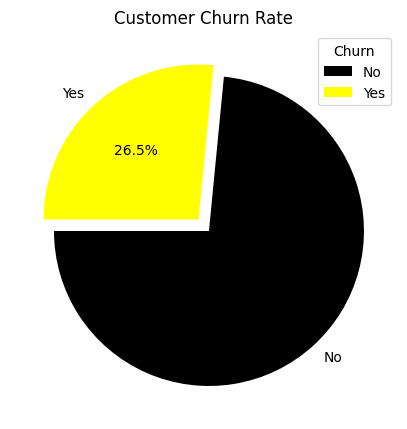

In [76]:
# visualize churn rate
palette = {'black','yellow'}
explode = (0.05, 0.05)
wp = {'linewidth':1}
plt.figure(figsize=(5,10))
plt.pie(churn['count'], labels=churn['Churn'], autopct='%1.1f%%', colors=palette,
        startangle=180, explode=explode)
plt.title('Customer Churn Rate')
plt.legend(title='Churn')
plt.show() 

- we can see from the pie chart that 26.5% of the total consumers discontinued the use of Telco services

#### 2. Services
Services provided by telco are Internet services and Phone services and phonelines.
- So lets do some analysis on these services.

#### 2.(a) Internet Services

In [77]:
print('Internet services distribution')
print(df.InternetService.value_counts(normalize=True))

Internet services distribution
InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64


In [78]:
print('Internet services churn rate')
print(df.groupby(['InternetService'])["Churn"].value_counts(normalize=True))

Internet services churn rate
InternetService  Churn
DSL              No       0.810409
                 Yes      0.189591
Fiber optic      No       0.581072
                 Yes      0.418928
No               No       0.925950
                 Yes      0.074050
Name: proportion, dtype: float64


- We see that 44% of the customers use fiber optics, 34% use DSL and 26% do not use internet services
- The rate at which customers churn fiber optic services is alarming. 42% of these users churn. What could be the problem?
- Lets look at the services that use internet.

#### 2.(a.i) Other services that use internet
Online Security, Online Backup, Device Protection, Tech support, streaming tv and streaming movies.

##### DSL 

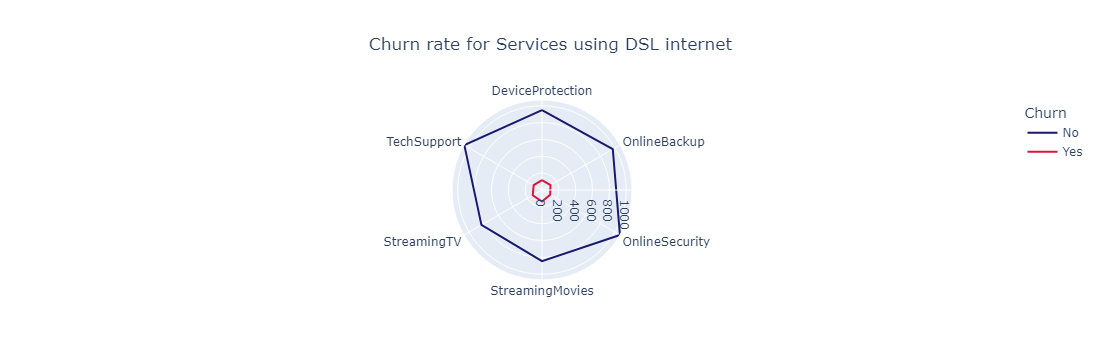

In [79]:
DSL = df[df['InternetService']=='DSL']
a = DSL[['Churn', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
   'StreamingTV', 'StreamingMovies']]
b = a.melt(id_vars=['Churn'])
b = b[b['value']=='Yes']
n = b.groupby(['variable'])['Churn'].value_counts().reset_index()

fig =  px.line_polar(n, r='count', theta='variable', color='Churn', line_close=True, title='Churn rate for Services using DSL internet',
                      color_discrete_sequence=['midnightblue','crimson']
                     )    
fig.update_layout(title_x=0.5)
fig.show()

In [80]:
n

,variable,Churn,count
0,DeviceProtection,No,948
1,DeviceProtection,Yes,117
2,OnlineBackup,No,970
3,OnlineBackup,Yes,116
4,OnlineSecurity,No,1068
5,OnlineSecurity,Yes,112
6,StreamingMovies,No,844
7,StreamingMovies,Yes,137
8,StreamingTV,No,830
9,StreamingTV,Yes,127


- Churn rate is very low (below 130 for all groups)
- Most prefered service for DSL internet is Tech support and Online security.

##### Fiber optic

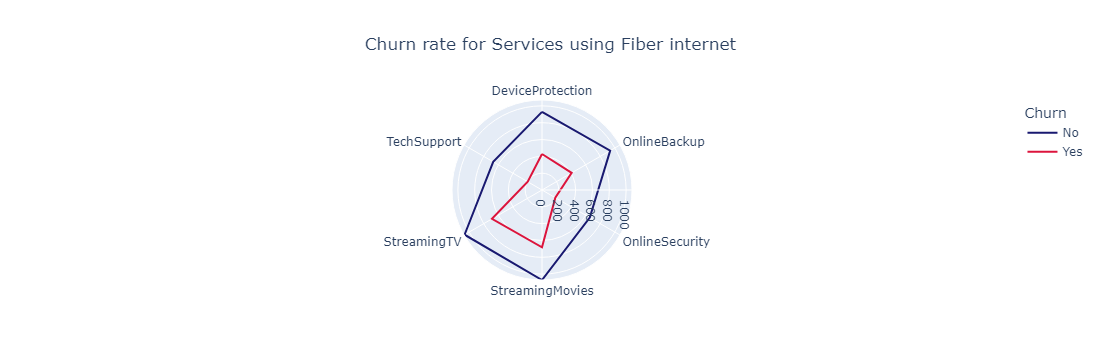

In [81]:
Fiber = df[df['InternetService']=='Fiber optic']
f = Fiber[['Churn', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
   'StreamingTV', 'StreamingMovies']]
g = f.melt(id_vars=['Churn'])
g = g[g['value']=='Yes']
n_ = g.groupby(['variable'])['Churn'].value_counts().reset_index()

fig2 =  px.line_polar(n_, r='count', theta='variable', color='Churn', line_close=True, title='Churn rate for Services using Fiber internet',
                      color_discrete_sequence=['midnightblue','crimson']
                     )    
fig2.update_layout(title_x=0.5)
fig2.show()

In [82]:
n_

,variable,Churn,count
0,DeviceProtection,No,929
1,DeviceProtection,Yes,428
2,OnlineBackup,No,936
3,OnlineBackup,Yes,407
4,OnlineSecurity,No,656
5,OnlineSecurity,Yes,183
6,StreamingMovies,No,1070
7,StreamingMovies,Yes,681
8,StreamingTV,No,1063
9,StreamingTV,Yes,687


- Most service used for fiber optic is streaming and also has the highest churn rate with 681 for those that stream movies and 687 for those that stream TV. This alone contributes to 73% of the total number of customers that churned.

#### 2.(b) Phone services

In [83]:
print(df['PhoneService'].value_counts(normalize=True))

PhoneService
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64


In [84]:
print(df.groupby(['PhoneService'])["Churn"].value_counts(normalize=True))

PhoneService  Churn
No            No       0.750733
              Yes      0.249267
Yes           No       0.732904
              Yes      0.267096
Name: proportion, dtype: float64


- 90% of the customers use phone services. 25% of these customers churned, This rate is also similar to those that do not use phone services.

#### 2.(c) MultipleLines

In [85]:
print(df['MultipleLines'].value_counts(normalize=True))

MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64


In [86]:
print(df.groupby(['MultipleLines'])["Churn"].value_counts(normalize=True))

MultipleLines     Churn
No                No       0.749558
                  Yes      0.250442
No phone service  No       0.750733
                  Yes      0.249267
Yes               No       0.713901
                  Yes      0.286099
Name: proportion, dtype: float64


- We can see that 48% of the customers have a single line and 42% have a two or more lines.
- The churn rate is slightly different across the groups, with those having multiple lines having a higher churn rate.

#### 3. Tenure
Shows the duration a customer has been using the company's services.

In [87]:
# summary statistics
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

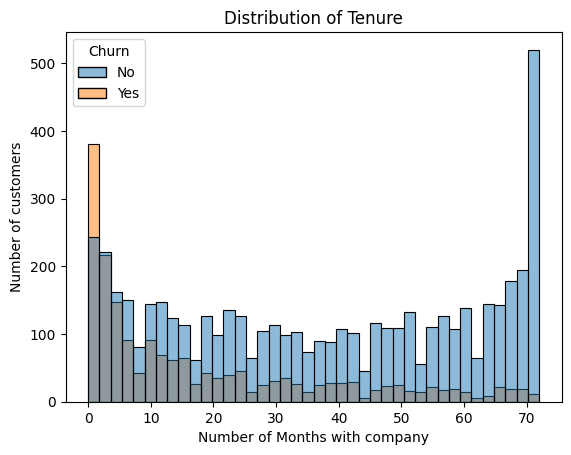

In [88]:
# Distribution
sns.histplot(data=df, x='tenure', hue='Churn', bins=40)
plt.title('Distribution of Tenure')
plt.xlabel('Number of Months with company')
plt.ylabel('Number of customers')
plt.savefig('distribution.png')

- The distribution of the customers that churned is right skewed. 
- New customers are most likely to churn within the first 3 months.
- Customer churn is on a down trend in relation to customer lifetime.

##### Splitting tenure into sub groups
We shall use this to further explore our data to capture patterns over time.

In [89]:

labels = ['0-1yr', '1-2yrs', '2-3yrs', '3-4yrs', '4-5yrs', '6yrs+']
df['duration'] = pd.cut(df['tenure'], bins=[0,12,24,36,48,60,72],
                            labels=['0-1yr', '1-2yrs', '2-3yrs', '3-4yrs', '4-5yrs', '6yrs+'])
df['duration'] = pd.qcut(df['tenure'], q=6, labels=labels)


#### Tenure vs Internet Services vs Churn.

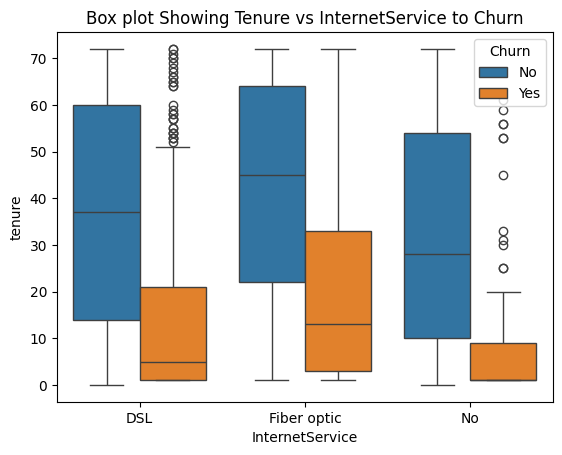

In [90]:
sns.boxplot(data=df, x='InternetService', y='tenure', hue='Churn')
plt.title('Box plot Showing Tenure vs InternetService to Churn')
plt.show()

- The variation of the medians between customers that churned and those that didnt is wide. With customers that churned having a shorter median time compared to those that do not churn.
- The also see some outliers for customers that churned and use DSL internet services.

In [91]:
df.pivot_table(values='tenure',
              index='InternetService',
              columns='Churn'
             )

Churn,No,Yes
InternetService,,
DSL,37.198777,14.111111
Fiber optic,42.089494,20.196608
No,32.331210,8.238938


- On average it takes a customer that uses DSL 14 months to churn, fiber optics 20 months to churn and those that do not use internet servives 8 months to churn.
- Customers that use fiber optics are most likely to stay for a longer time.

In [92]:
df.pivot_table(values='tenure',
              index='MultipleLines',
              columns='Churn'
             )

Churn,No,Yes
MultipleLines,,
No,28.660370,10.590106
No phone service,37.017578,15.835294
Yes,48.377181,25.788235


- Customers with single lines have the highest chance to churn within the first year of using the service.
- Customers with more than one line on average stay longer than those with single lines.

#### 4. Contract


In [93]:
print(df.groupby('Contract')['Churn'].value_counts(normalize=True))
print('')
print(df['Contract'].value_counts(normalize=True))

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64

Contract
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64


- 55% of the customers have subscribed to a month-to-month contract.
- 42% of the customers that subscribe to a month to month contract churned.
- There is a very small chance of 2% that a person that subscribed for a two year contract actually churned.

##### 4.1 Contract VS tenure

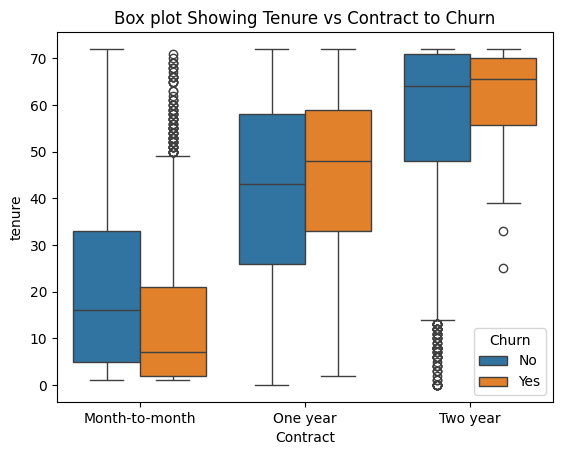

In [94]:
sns.boxplot(data=df, x='Contract', y='tenure', hue='Churn')
plt.title('Box plot Showing Tenure vs Contract to Churn')
plt.show()

- We see different median values for different contracts
- The variabilities differ between those that churned and those that didn't. It is wider for month to month contract but its almost the same for two year contracts
- There are some outliers for customers that churned on a month to month contract, and customers who subscribed for a two year contract.
- Lets look at the average time taken for customers with different contracts take to churn.

In [95]:
df.pivot_table(values='tenure',
              index='Contract',
              columns='Churn'
             )

Churn,No,Yes
Contract,,
Month-to-month,21.033333,14.016918
One year,41.674063,44.963855
Two year,56.602914,61.270833


- it takes an average of 14 months for a customer who subscribes for month-to-month contract to churn.
- The average time taken for those who churn from the one year and two year contracts is higher than those that donot.
- Lets lets look at the trend for churn for these contracts 

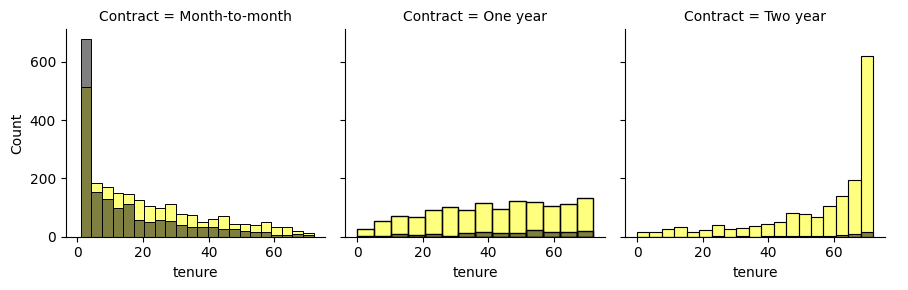

In [96]:
contract = df[['Contract', 'Churn','tenure']]
g = sns.FacetGrid(contract, col='Contract', col_wrap=3)
g.map_dataframe(sns.histplot, x='tenure', hue='Churn', 
               palette={'black', 'yellow'}, hue_order=['Yes', 'No'] )
g.add_legend()
plt.show()

- black represents customers that churn
- yellow for customers that did not churned.
- We can see that the number of customers that subscribe to month-to-month contract decreases with time for both groups(churners and non churners). and those that churn decreases at a faster rate compared to those that did not churn.
- Customers that subscribed to a one-year contract have a flatter curve. we see the proportion of those that churn to those that do not is large.
- Customers that subscribe to a two year contract have an uptrend. showing more customers subscribe to this type of contract with time. this could also mean that customers cross over from the other types of contracts to two-year contract. we also see that the churn rate in this group is very low.

##### 4.2 Contract Vs Services
##### 4.2.1 internet services

In [97]:
(pd.crosstab(df['Contract'],[df['InternetService'], df['Churn']]))


InternetService  DSL      Fiber optic         No    
Churn             No  Yes          No   Yes   No Yes
Contract                                            
Month-to-month   829  394         966  1162  425  99
One year         517   53         435   104  355   9
Two year         616   12         398    31  633   5

- The main figure we look at is 1162 customers that churned from using fiber optic and were on month-to-month contract. this is alarming and we shall have to look at this further during our analysis. Why so many in this category?
- Next, we look at multiple line services.

##### 4.2.2 multiple Lines

In [98]:
(pd.crosstab(df['Contract'],[df['MultipleLines'], df['Churn']]))


MultipleLines     No      No phone service       Yes     
Churn             No  Yes               No  Yes   No  Yes
Contract                                                 
Month-to-month  1237  780              223  153  760  722
One year         653   59              131   14  523   93
Two year         651   10              158    3  838   35

- We can see that most customers have a single line and the churn rate of those with multiple lines being high.

#### 5. Payment Method

In [99]:
print(df['PaymentMethod'].value_counts(normalize=True))

PaymentMethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64


In [100]:
print(df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True))
print('')


PaymentMethod              Churn
Bank transfer (automatic)  No       0.832902
                           Yes      0.167098
Credit card (automatic)    No       0.847569
                           Yes      0.152431
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.808933
                           Yes      0.191067
Name: proportion, dtype: float64



- Electronic Check is the most popular payment method used.
- We see that 45% of the cutomers that use electronic check churned. this is a very big difference compared to other payment method churn rates.
- From the data avilable we know that payments were made either by paperless mean or with paper lets add this to payment method to get more insights.

##### 5.1 PaperlessBilling

In [101]:
print(df['PaperlessBilling'].value_counts(normalize=True))
print('')

PaperlessBilling
Yes    0.592219
No     0.407781
Name: proportion, dtype: float64



In [102]:
print(df.groupby(['PaperlessBilling'])['Churn'].value_counts(normalize=True))

PaperlessBilling  Churn
No                No       0.836699
                  Yes      0.163301
Yes               No       0.664349
                  Yes      0.335651
Name: proportion, dtype: float64


- 59% of the customers use paperless billing to make thier payments. We also see that 33% of these customers actually churned.
- lets add this data to payment data.

##### 5.1.2 Paperlessbilling Vs PaymnetMethod Vs Churn

In [103]:
pd.crosstab(df['PaymentMethod'],[df['PaperlessBilling'], df['Churn']])

PaperlessBilling            No       Yes     
Churn                       No  Yes   No  Yes
PaymentMethod                                
Bank transfer (automatic)  581   72  705  186
Credit card (automatic)    576   64  714  168
Electronic check           419  204  875  867
Mailed check               827  129  477  179

- since 45% of customers who use electronic check payment method churned, most likely they were also using paperless billing method.
- lets visualize this to get a better look.

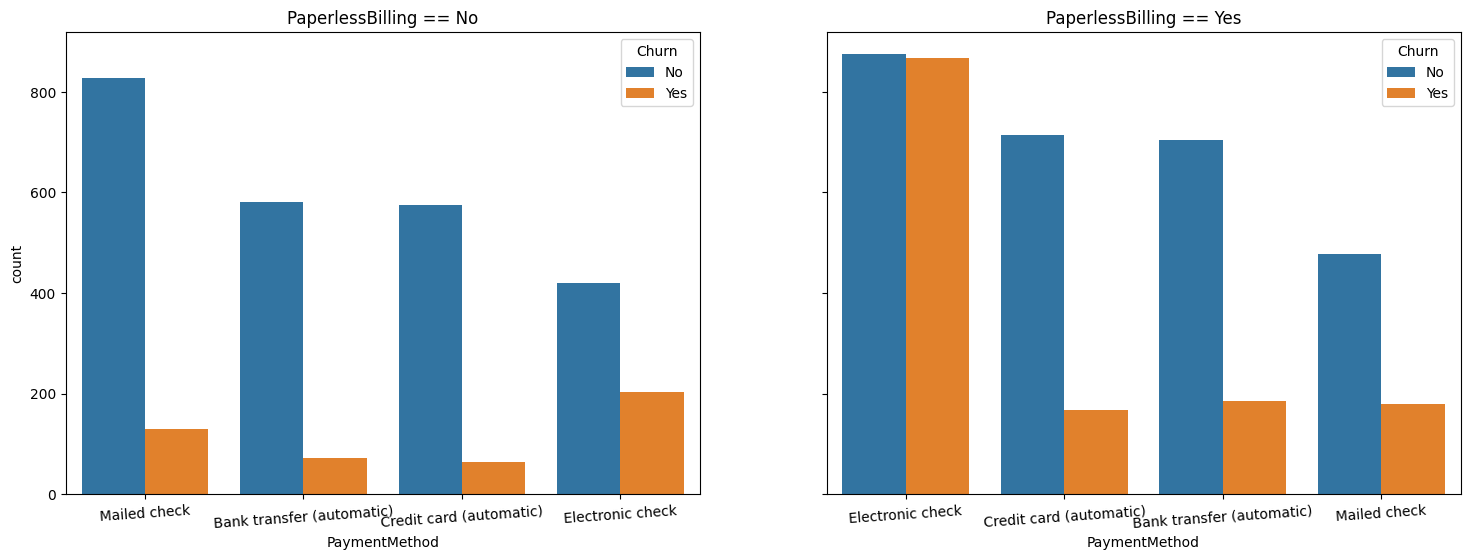

In [104]:

bill_vs_payment = df.groupby(['Churn','PaperlessBilling'])['PaymentMethod'].value_counts().reset_index()

no = bill_vs_payment[bill_vs_payment['PaperlessBilling']=='No']
yes = bill_vs_payment[bill_vs_payment['PaperlessBilling']=='Yes']

fig, ax = plt.subplots(1,2, sharey=True, figsize=[18,6])
sns.barplot(data=no, x='PaymentMethod', y='count', hue='Churn', ax=ax[0])

sns.barplot(data=yes, x='PaymentMethod', y='count', hue='Churn', ax=ax[1])
ax[0].tick_params(axis='x',rotation=4)
ax[0].set_title('PaperlessBilling == No')
ax[1].set_title('PaperlessBilling == Yes')
plt.xticks(rotation=1)
plt.xticks(rotation=4)
plt.savefig('bills.png')

- We can see that there is a big problem with paperlessbilling for the payment method (electric check). This must be looked into and solutions should be found.


##### 5.2 PaymentMethod Vs InternetService

In [105]:
(pd.crosstab(df['Churn'],[df['PaymentMethod'], df['InternetService']]))

PaymentMethod   Bank transfer (automatic)                   \
InternetService                       DSL Fiber optic   No   
Churn                                                        
No                                    513         459  314   
Yes                                    53         187   18   

PaymentMethod   Credit card (automatic)                  Electronic check  \
InternetService                     DSL Fiber optic   No              DSL   
Churn                                                                       
No                                  522         446  322              441   
Yes                                  72         151    9              207   

PaymentMethod                    Mailed check                   
InternetService Fiber optic   No          DSL Fiber optic   No  
Churn                                                           
No                      746  107          486         148  670  
Yes                     849   15          127         110   71

- From 4.2.1 we saw that month-to-month contract and fiber optic internet services was the most churned group, lets add payment method for further analysis
- from the table above we can see that indeed electronic check payment method needs attention.

#### 6. MonthlyCharges

In [106]:
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [107]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

- we can see the mean monthly charge of people that churned is greater than those that did not churn
- Lets look at the distribution

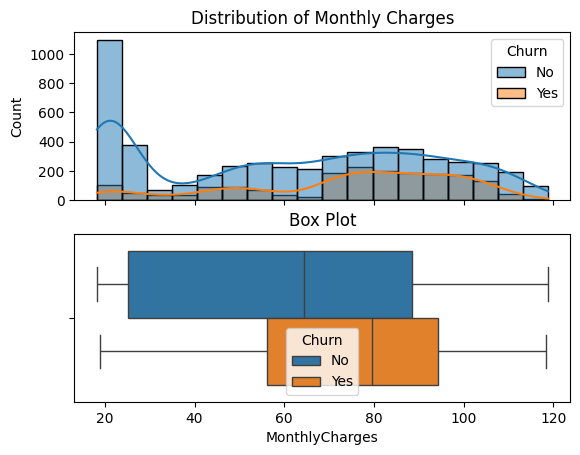

In [108]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, ax=ax[0])
sns.boxplot(data=df, x='MonthlyCharges', hue='Churn', orient='h',width=0.8 , ax=ax[1])
ax[0].set_title('Distribution of Monthly Charges')
ax[1].set_title('Box Plot')
plt.show()

- Right skewed.
- there are no outliers

#### 7. Total Charges

In [109]:
df.TotalCharges.describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [110]:
df.groupby('Churn')['TotalCharges'].mean()

Churn
No     2554.765772
Yes    1531.796094
Name: TotalCharges, dtype: float64

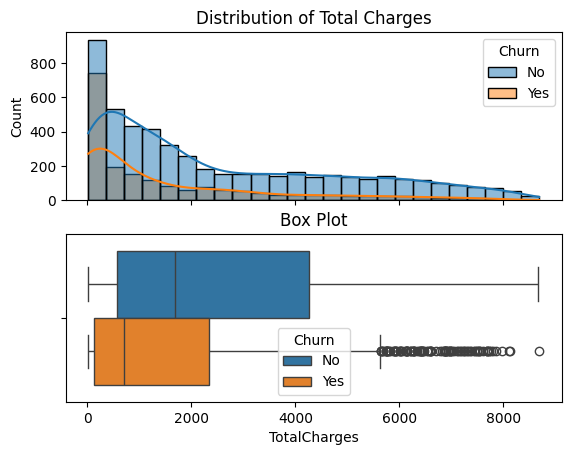

In [111]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, ax=ax[0])
sns.boxplot(data=df, x='TotalCharges', hue='Churn', orient='h',width=0.8 , ax=ax[1])
ax[0].set_title('Distribution of Total Charges')
ax[1].set_title('Box Plot')
plt.show()

- Right skewed distribution.
- With Outliers for customers that churned.

##### Relationship between monthly charges total charges and duration a customer has been with the company

<Axes: >

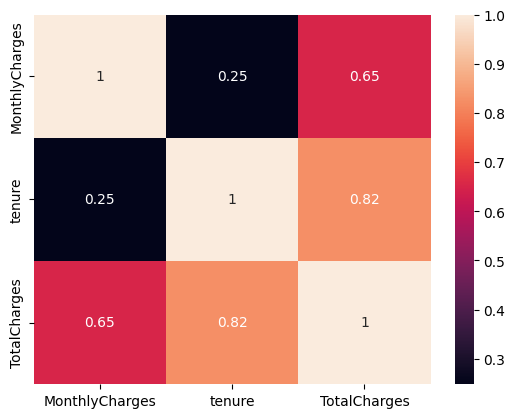

In [112]:
correlation = df[['MonthlyCharges','tenure','TotalCharges']].corr()
sns.heatmap(correlation, annot=True)

- There is a very strong positive relationship between tenure and total charges
- There is a very weak positive relationship between tenure and monthly charges
- There is a strong positive relationship between monthly charges and total charges
##### Lets visualize these relationships in relation to churn

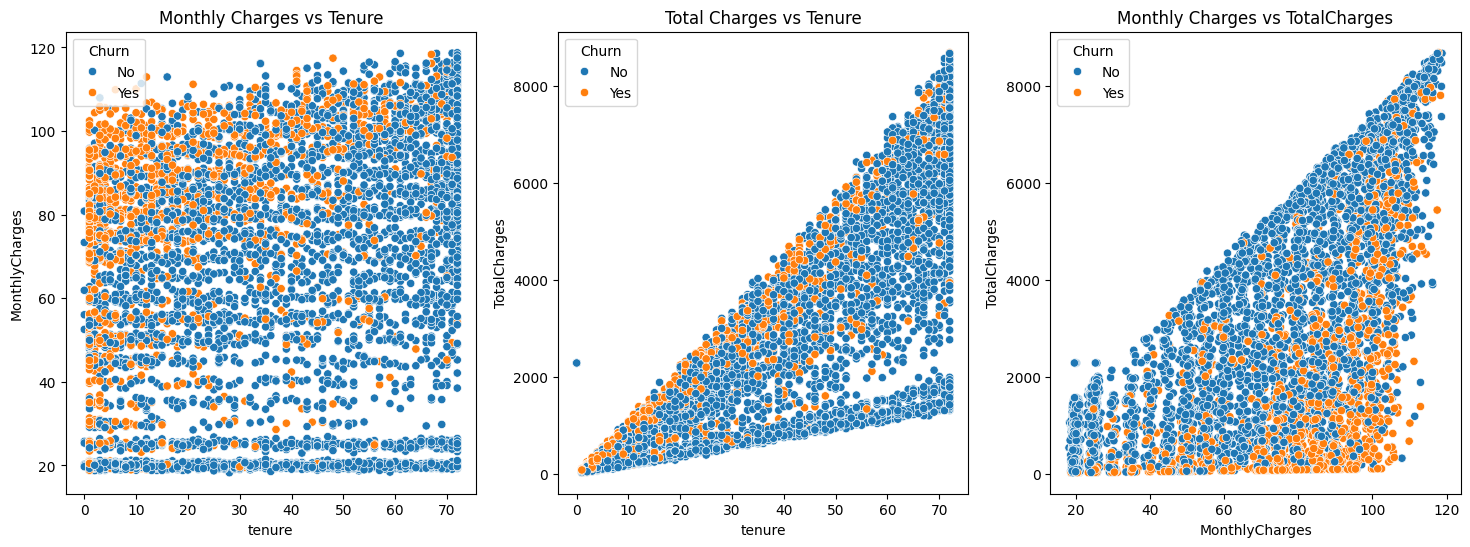

In [113]:
fig, ax = plt.subplots(1,3, figsize=[18, 6])
sns.scatterplot(df, x='tenure', y='MonthlyCharges', hue='Churn', ax=ax[0])
sns.scatterplot(df, x='tenure', y='TotalCharges', hue='Churn', ax=ax[1])
sns.scatterplot(df, y='TotalCharges', x='MonthlyCharges', hue='Churn', ax=ax[2])

ax[0].set_title('Monthly Charges vs Tenure')
ax[1].set_title('Total Charges vs Tenure')
ax[2].set_title('Monthly Charges vs TotalCharges')
plt.show()

- We can see that their is no relationship between monthly charges and tenure. but we can see that the number of customers that churned are concentrated in the left upper conner of the plot. This indicates that those with a were charged a high fee in the first few months have a high chance of churning.

- We can see that there is a positive relationship between total charges and tenure. But we also see that the customers who churned are mostly concentrated on the upper side indicating for all inspite of the tenure, customers who churned are mostly amoung those that paid most in total .

- We can also see that there is also a positive relationship between monthly charges and total charges. But in comparision to our target, we can see that most customers who churned most are concentrated in the lower right side of the scatter plot.

##### Monthly Charges vs Contract

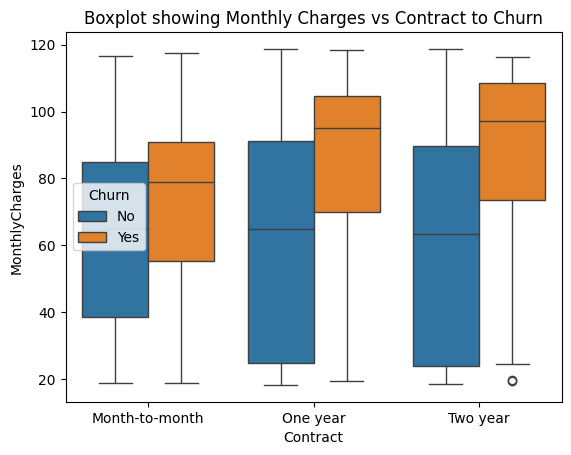

In [114]:
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Boxplot showing Monthly Charges vs Contract to Churn')
plt.show()

- similar median variations for customers that did not churn in all contract typres.
- A higher median monthly charge is seen for all customers that churned for all contract types.

#### 8. Demographic information
#### 8.1 Gender

In [115]:
print(df.groupby('gender')['Churn'].value_counts())

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: count, dtype: int64


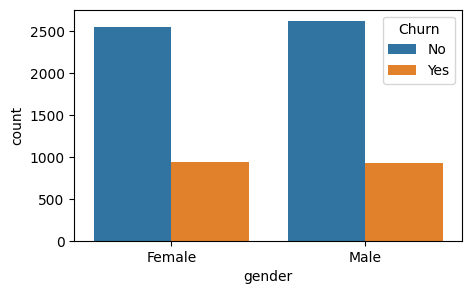

In [116]:
fig =plt.subplots(figsize=[5,3])
sns.countplot(data=df, x='gender', hue='Churn')
plt.show()


### B. Feature Engineering
In constructing a set of behavioral metrics from the dataset, I employ one-hot encoding which 
converts categorical data into a numerical format that can be used in machine learning algorithms.

In [117]:
def gen_dummies(dataframe,x):
    dataframe = pd.get_dummies(dataframe, columns=[x])
    return dataframe

In [118]:
service_vs_multiplelines =df[['PhoneService','MultipleLines']]
service_vs_multiplelines = gen_dummies(service_vs_multiplelines,'MultipleLines')

df = df.drop(['PhoneService','MultipleLines'], axis=1)
df = pd.concat([df,service_vs_multiplelines], axis=1)
df = df.drop('MultipleLines_No phone service', axis=1)

In [119]:
encoded_df = df[['PaperlessBilling','PaymentMethod','InternetService','PhoneService','Contract','duration']]
dummies = ['InternetService','Contract','PaymentMethod']

for i in dummies:
    encoded_df = gen_dummies(encoded_df, i)
df = df.drop(['PaperlessBilling','PaymentMethod','InternetService','PhoneService','Contract','duration'], axis=1)

df = pd.concat([encoded_df,df], axis=1)

##### Re-organize the data 

In [120]:
churn = df.pop('Churn')
df = pd.concat([df,churn], axis=1)

#encoding objects into binary since our answers are either yes or no
list = df.select_dtypes(include=['object']).columns.tolist()
df[list] = ((df[list]=='No').astype(int))

#encoding bools into binary since our data is either true or false
bool = df.select_dtypes(include=['bool']).columns.tolist()
df[bool] = ((df[bool]==False).astype(int))

# droping columns we wont need
df = df.drop(['customerID', 'duration'],axis=1)

# final look at our data
df.head(10)

,PaperlessBilling,PhoneService,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_Yes,Churn
0,0,1,0,1,1,0,1,1,1,1,...,0,1,1,1,1,29.85,29.85,1,1,1
1,1,0,0,1,1,1,0,1,1,1,...,1,0,1,1,1,56.95,1889.50,0,1,1
2,0,0,0,1,1,0,1,1,1,1,...,0,1,1,1,1,53.85,108.15,0,1,0
3,1,1,0,1,1,1,0,1,0,1,...,1,0,0,1,1,42.30,1840.75,1,1,1
4,0,0,1,0,1,0,1,1,1,1,...,1,1,1,1,1,70.70,151.65,0,1,0
5,0,0,1,0,1,0,1,1,1,1,...,1,0,1,0,0,99.65,820.50,1,0,0
6,0,0,1,0,1,0,1,1,1,0,...,0,1,1,0,1,89.10,1949.40,1,0,1
7,1,1,0,1,1,0,1,1,1,1,...,1,1,1,1,1,29.75,301.90,1,1,1
8,0,0,1,0,1,0,1,1,1,1,...,1,0,0,0,0,104.80,3046.05,1,0,0
9,1,0,0,1,1,1,0,1,0,1,...,0,1,1,1,1,56.15,3487.95,0,1,1


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PaperlessBilling                         7043 non-null   int32  
 1   PhoneService                             7043 non-null   int32  
 2   InternetService_DSL                      7043 non-null   int32  
 3   InternetService_Fiber optic              7043 non-null   int32  
 4   InternetService_No                       7043 non-null   int32  
 5   Contract_Month-to-month                  7043 non-null   int32  
 6   Contract_One year                        7043 non-null   int32  
 7   Contract_Two year                        7043 non-null   int32  
 8   PaymentMethod_Bank transfer (automatic)  7043 non-null   int32  
 9   PaymentMethod_Credit card (automatic)    7043 non-null   int32  
 10  PaymentMethod_Electronic check           7043 no

### C. Machine Learning
Our goal is to use the features to predict churn. 
- We will set up supervised machine learning experiment were we divide our data into training and evaluation/test sets then we shall
use the features above during the training period and use these features to predict churn during the evaluation period.
- Using k-fold cross validation and grid-search we will train several supervised learning algorithims on randomized subsets of individuals.
- The specific algorithims we test are logistic regression, K-Nearest Neighbours, Random Forests , Gradientboost trees and Naive-Bayes.

#### Data pre-processing method
- we shall standardize our dataset to the mean and standard deviation of each feature using skearn's standard scaler preprocessor
- We shall also use imbalanced learn to random over sample our training data. Oversampling the training data balances class distribution so as to reduce bias towards the majority class.

In [122]:
#splitting and scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]#.values
y = df[df.columns[-1]]#.values

transformer = StandardScaler()
X = pd.DataFrame(transformer.fit_transform(X),
                columns = transformer.get_feature_names_out())

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=3)

##### Oversampling training data

In [123]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=3)
X_res,y_res = ros.fit_resample(X_train,y_train)


In [124]:
print('Total samples of class 1 before over sampling:',len(y_train[y_train==1]))
print('Total samples of class 0 before over sampling:',len(y_train[y_train==0]))
print('')
print('Total samples of class 1 after over sampling:',len(y_res[y_res==1]))
print('Total samples of class 0 after over sampling:',len(y_res[y_res==0]))

Total samples of class 1 before over sampling: 3606
Total samples of class 0 before over sampling: 1324

Total samples of class 1 after over sampling: 3606
Total samples of class 0 after over sampling: 3606


#### Model selection

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=3)

param_grid = {'n_neighbors': (5,7,10)}

param_grid_rf = {'n_estimators':(10,50,100,150,200,250,350,500)}

param_grid_lg ={'penalty':['l1','l2'],
                'C':[0.1,1,10],
                'max_iter':[100,500,1000]}

param_grid_NB = {}  

param_grid_XG = {'learning_rate':[0.2],
                 'max_depth':[4]}



knn = KNeighborsClassifier()
logReg = LogisticRegression()
GaussianNB = GaussianNB()
xgb = XGBClassifier()
randomforests = RandomForestClassifier(random_state=3)

GaussianNB_cv = GridSearchCV(estimator=GaussianNB,
                      param_grid=param_grid_NB,
                      cv=kf)

logreg_cv = GridSearchCV(estimator=logReg,
                      param_grid=param_grid_lg,
                      cv=kf)

knn_cv = GridSearchCV(estimator=knn,
                      param_grid=param_grid,
                      cv=kf)

rf_cv = GridSearchCV(estimator=randomforests,
                      param_grid=param_grid_rf,
                      cv=kf)
xgb_cv = GridSearchCV(estimator=xgb,
                      param_grid=param_grid_XG,
                      cv=kf)

knn_cv.fit(X_res, y_res)
rf_cv.fit(X_res, y_res)
GaussianNB_cv.fit(X_res, y_res)
logreg_cv.fit(X_res, y_res)
xgb_cv.fit(X_res, y_res)



print('KNeigborsClassifier', knn_cv.best_params_, knn_cv.best_score_)
print('RandomForestClassifier', rf_cv.best_params_, rf_cv.best_score_)
print('GaussianNB', GaussianNB_cv.best_params_, GaussianNB_cv.best_score_)
print('LogisticRegression', logreg_cv.best_params_, logreg_cv.best_score_)
print('Gradientboost', xgb_cv.best_score_)

KNeigborsClassifier {'n_neighbors': 5} 0.7626169859179568
RandomForestClassifier {'n_estimators': 350} 0.8901838037760369
GaussianNB {} 0.7430684071460771
LogisticRegression {'C': 10, 'max_iter': 100, 'penalty': 'l2'} 0.7598455598455598
Gradientboost 0.800056324328169


The accuracy score for predictive performance of classification algorithims:
- RandomForest Classifier 89%
- XGBoost Classifier 80%
- K Nearest Neigbors Classifier 76%
- Logistic Regression classifier 76%
- Gaussian Naive Bayes classifier 74%
######
We can see that Random forest classifier has the best accuracy score of 89%, followed by XGBoost Classifier with 80%, KNN and Logistic regression classifiers having the same at 76% and lastly Naive Bayes with the lowest.

######
Next, we evaluate these models to see how they will perform on unseen data.

#### Model Evaluation
##### Predicting churn
To evaluate the performance of our predictive framework, we shall use the trained model to predict the probability that a customer will churn using the test dataset.
- we shall use classification report and roc_auc_score from sklearn.

In [126]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

#fitting the model to our test data
y_lg_predict = logreg_cv.predict(X_test)
y_knn_predict = knn_cv.predict(X_test)
y_predict = rf_cv.predict(X_test)
y_pred = xgb_cv.predict(X_test)

#printing out the results
print(' ')
print('********** RandomForest Classification Report ************')
print(classification_report(y_test,y_predict))
print('************ XGBoost Classification Report ***************')
print(classification_report(y_test,y_pred))
print('******** Logistic regression Classification Report *******')
print(classification_report(y_test,y_lg_predict))
print('************** KNN Classification Report *****************')
print(classification_report(y_test,y_knn_predict))
print(' ')
print('************************ ROC Score ***********************')
print('Random Forest ROC score: ', round(roc_auc_score(y_test,y_predict),2))
print('XGBoost ROC score: ', round(roc_auc_score(y_test,y_pred),2))
print('Logistic reg ROC score: ', round(roc_auc_score(y_test,y_lg_predict),2))
print('KNN ROC score: ', round(roc_auc_score(y_test,y_knn_predict),2))


 
********** RandomForest Classification Report ************
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       545
           1       0.86      0.87      0.86      1568

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.73      2113
weighted avg       0.79      0.79      0.79      2113

************ XGBoost Classification Report ***************
              precision    recall  f1-score   support

           0       0.55      0.79      0.65       545
           1       0.91      0.78      0.84      1568

    accuracy                           0.78      2113
   macro avg       0.73      0.78      0.75      2113
weighted avg       0.82      0.78      0.79      2113

******** Logistic regression Classification Report *******
              precision    recall  f1-score   support

           0       0.53      0.80      0.64       545
           1       0.92      0.75      0.83      1568

   

Interpreting our results based on class 0 which represents the customers that churned:
- Precision: it measures the accuracy of the models positive predictions. its calculated as the ratio of true positives(TP) to the sum of true positives and false positives(FP):: precision = TP(TP/FP)
  - From our model Random Forest and XGBoost Classifiers have the best precision values at 60% and 55% respectively.
  - High precision means that the model is good at predicting positive classes accurately.
######
- Recall: this measures the proportion of actual positive instances that are correctly predicted by the model.:: recall= TP(TP+FN) where FN is false negative.
   - we can see that Logistic regression, XGboost and KNN classifiers have the best recall rates of 80%, 79% and 72% respectively,
   - High recall means that the model is good at detecting most positive instances.
######
- f1 score: This is the harmonic mean of precision and recall:: f1 score = (precision + recall)/2
  - We can see that XGBoost and Logistic regressions have a 65% and 64% f1 scores respectively.
######
- Accuracy: Measures the proportion of correctly classified instances.:: accuracy = (TP + TN)/ (TP + TN +FP + FN)
  - from our model, Random forest classifier has the best accuracy of 79%, followed by XGBoost classifier with 78%, Logistic Regression Classifier with 77% in third place.
######
- ROC-AUC score: This is another metric that helps to evaluate model performance of binary classification. it Recieiver Operating Characteristic-Area Under Curve in full. it measures the models ability to distinguish between positive and negative classes.
  - we see that logistic regression and XGBoost classifiers have the best ROC-AUC scores.
  - Higher ROC score indicates better performance, 0.5 represents random guessing.
  - below is the plot of the ROC-AUC curve showing each AUC of the different models

##### ROC Curve

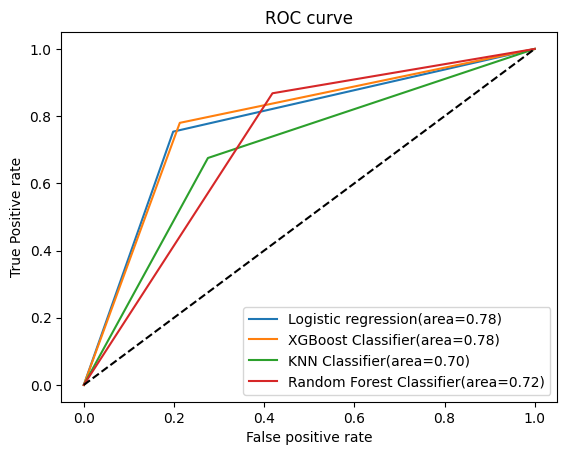

In [127]:
from sklearn.metrics import roc_curve
fallout_xg, sensitivity_xg, thresholds_xg = roc_curve(y_test, y_pred)
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, y_lg_predict)
fallout_knn, sensitivity_knn, thresholds_knn = roc_curve(y_test, y_knn_predict)
fallout_rf, sensitivity_rf, thresholds_rf = roc_curve(y_test, y_predict)

y_lg_predict = logreg_cv.predict(X_test)
y_knn_predict = knn_cv.predict(X_test)
y_predict = rf_cv.predict(X_test)
y_pred = xgb_cv.predict(X_test)

plt.plot(fallout_lr, sensitivity_lr, label='%s' % 'Logistic regression(area=0.78)')
plt.plot(fallout_xg, sensitivity_xg, label='%s' % 'XGBoost Classifier(area=0.78)')
plt.plot(fallout_knn, sensitivity_knn, label='%s' % 'KNN Classifier(area=0.70)')
plt.plot(fallout_rf, sensitivity_rf, label='%s' % 'Random Forest Classifier(area=0.72)')
plt.plot([0,1],[0,1], 'k--')
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC curve")
plt.show()

The models are able to maintain a reasonable balance between true positive and false positive rates 
across different thresholds.
The XGBoost Classifier and Logistic regression perform best as their curves are the closest to the 
top left corner. However, the difference between the models are not drastic, suggesting that all of 
them might be suitable.

#####
But for the best and consistent results, we reccomend using XGBoost classifier and from now on we shall be using it for setting churn score,
and for features that are most predictive of churn


#### Feature importance

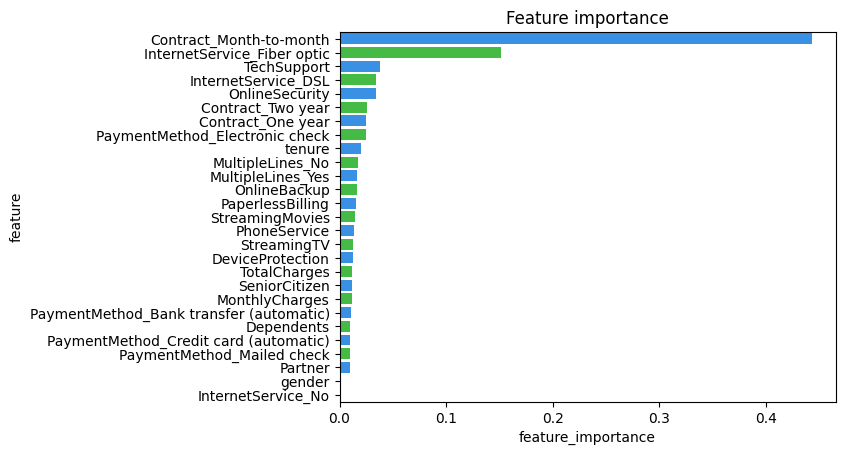

In [128]:
feature_importance_df = pd.DataFrame(xgb_cv.best_estimator_.feature_importances_,
                                     index=xgb_cv.best_estimator_.feature_names_in_).reset_index()
feature_importance_df = feature_importance_df.rename(columns={'index':'feature', 0:'feature_importance'})

feature_importance_df = feature_importance_df.sort_values('feature_importance', ascending=False)

feature_importance_df = feature_importance_df

sns.barplot(data=feature_importance_df, x='feature_importance',
            y= 'feature', palette={'LimeGreen', 'DodgerBlue'})
plt.title('Feature importance');

- From the plot we can see that Month-to-month Contract is the most important feature, followed by internetservice fiber optic, tech support, internet service DSL, online security and two-year contract, one-year contract as the top features that help to determine if a customer will churn or not.

Next, we use the model to set a churn probability of churn for each customer. This will also be known as the churn score. 

#### Setting churn scores thresholds

In [129]:
# Getting the probabilities
prob = xgb_cv.predict_proba(X_test)

# summary statistics for the probabilities
print(pd.DataFrame(prob).describe())
prob_df = pd.DataFrame(prob)

                 0            1
count  2113.000000  2113.000000
mean      0.372703     0.627297
std       0.312425     0.312425
min       0.000629     0.015803
25%       0.066462     0.331925
50%       0.302942     0.697058
75%       0.668075     0.933538
max       0.984197     0.999371


In [130]:
print(pd.DataFrame(y_test).value_counts())
y = pd.DataFrame(y_test).reset_index()

new_df = pd.concat([prob_df, y], axis=1)
print(new_df.head(10))

Churn
1        1568
0         545
Name: count, dtype: int64
          0         1  index  Churn
0  0.834801  0.165199    808      0
1  0.386238  0.613762   1496      1
2  0.904184  0.095816   4326      0
3  0.711518  0.288482    492      0
4  0.029954  0.970046   2215      1
5  0.082176  0.917824   4445      1
6  0.718479  0.281521   1934      0
7  0.719331  0.280669   1166      1
8  0.154606  0.845394   1278      1
9  0.080696  0.919304    591      1


- we know that the 0 represents churners and 1 represents non-churners
- we shall use the column 0 for setting a threshold for those that churn.
- we see that the average probability in our target column is 0.376
- lets calculate the churning threshold with a percentile of 50

In [131]:
# Calculating the probability from 50% threshold
threshold_50 = np.quantile(new_df[0],0.50)
print(threshold_50)

0.30294203758239746


- Our threshold is 0.3 from a percentile of 50.
- If a customer has a probability/score greater than 30, then then we categorize them as churners, else non churners.
- lets apply this threshold our data and see how it well it predicts customers that churn.
- We shall also calculate the bad rate, which is a percentage of customers that were classified as churners but are not churners.

In [132]:
# Applying Churn rate threshold
new_df['pred_churn_status'] = new_df[0].apply(lambda x: 0 if x > 0.31 else 1)
print(new_df['pred_churn_status'].value_counts())

# creating a subset for those that only churned from pred_churn_status where status = 0
pred_churn = new_df[new_df['pred_churn_status']==0]
pred_churn.head()

pred_churn_status
1    1070
0    1043
Name: count, dtype: int64


,0,1,index,Churn,pred_churn_status
0,0.834801,0.165199,808,0,0
1,0.386238,0.613762,1496,1,0
2,0.904184,0.095816,4326,0,0
3,0.711518,0.288482,492,0,0
6,0.718479,0.281521,1934,0,0


In [133]:
# Calculating the bad rate ie how many customers who did not churn but were counted as churners
print(np.sum(pred_churn['Churn'])/ pred_churn['Churn'].count())

0.5417066155321189


- The bad rate for a 0.3 threshold is 54%. this means that 54% of the customers were non-churners. it is a poor estimator for classifying churn.
- Next step is to look for the best threshold and the best score for predicting if a customer will churn.

In [134]:
def best_threshold(t):
    threshold = np.quantile(new_df[0],t)
    new_df['pred_churn_status'] = new_df[0].apply(lambda x: 0 if x > threshold else 1)
    pred_churn = new_df[new_df['pred_churn_status']==0]
    bad_rate = np.sum(pred_churn['Churn'])/ pred_churn['Churn'].count()
    return threshold, bad_rate

In [135]:
bad_rates = []
percentile = []

for i in np.arange(0,1,0.05):
    percentile.append(i)
    bad_rates.append(best_threshold(i))
    

strategy_df = pd.concat([pd.DataFrame(np.round(percentile,2), columns=['percentile'])\
                      ,pd.DataFrame(np.round(bad_rates,2), columns=['threshold', 'bad_rate'])], axis=1)
print(strategy_df)

    percentile  threshold  bad_rate
0         0.00       0.00      0.74
1         0.05       0.01      0.73
2         0.10       0.02      0.71
3         0.15       0.02      0.70
4         0.20       0.04      0.68
5         0.25       0.07      0.66
6         0.30       0.10      0.64
7         0.35       0.14      0.62
8         0.40       0.19      0.60
9         0.45       0.24      0.57
10        0.50       0.30      0.54
11        0.55       0.37      0.52
12        0.60       0.45      0.48
13        0.65       0.52      0.44
14        0.70       0.60      0.40
15        0.75       0.67      0.36
16        0.80       0.72      0.33
17        0.85       0.78      0.30
18        0.90       0.84      0.26
19        0.95       0.90      0.16


- From the strategy table above, the best threshold is 0.90 with a bad rate of 16% of miss classifying non churners as churners.
- This table helps to create strategies that focus on preventing customers from churning by early detection and ensure timely resolution of issues.

Below is a plot showing thresholds for 80 and 90 percentiles.

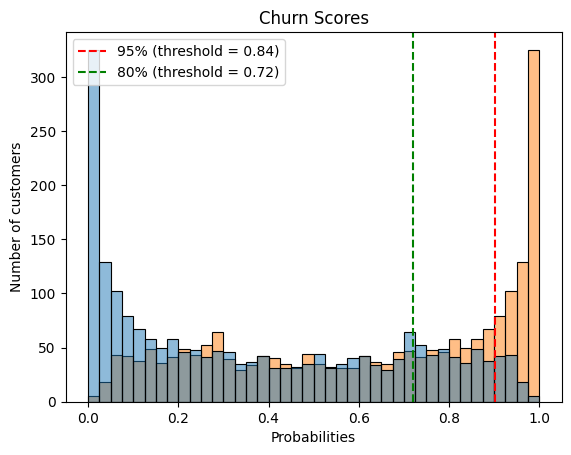

In [136]:
upper_limit = np.quantile(new_df[0],0.95)
lower_limit = np.quantile(new_df[0],0.80)
threshold = np.quantile(new_df[0],0.90)
sns.histplot(prob, bins=40)
plt.axvline(x=upper_limit, color='red',linestyle='dashed', label='95% (threshold = 0.84)')
plt.axvline(x=lower_limit, color='green',linestyle='dashed', label='80% (threshold = 0.72)')
plt.ylabel('Number of customers')
plt.xlabel('Probabilities')
plt.title('Churn Scores')
plt.legend()
plt.savefig('prob.png')

### Conclusions and Recommendations

#### Exploratory data analysis results
- 26.5% of the total consumers discontinued the use of Telco services. we also found that the 73% customers that churned were using fiber optic internet service for streaming Tv and streaming movies. 
- We also found that 62%  of customers that churned were using fiber optic and had subscribed to a month-to-month contract, 849 out of 1595 customers that used electronic payment method to pay fiber optic internet services churned, and also we see that 50% of those that use paperless billing method and electronic check churned.
We found out that paperless billing is the biggest root cause for customers churn for the previous month. this could be a problem with payment system which needs further investigation.

#### Machine Learning analysis results.
- We found XGBosst classifier as the best predictor of churn, with an accuracy of 78%.
- Month-to-month contract and internet fiber optic were the most predictors of churn.
- We used the model to set churn (score) on each customer i.e. the probability that a customer will churn.
- We also used the model to create a strategy table which shows different thresholds for churn prediction and their bad rates. This helps the company to create strategies that focus on churn preventation, and the amount of customers they are willing to risk and loose.
- An example of a startegy for customer churn prevention is; if a customers churn score reaches 0.7, conducting surveys and feedback sessions to these customers will be a good way to of finding issues. Then you can offer solutions, personalized services and recommendations to ensure timely resolution of issues.
